In [6]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder # Transformation from Categorical to numeric
from sklearn.preprocessing import OneHotEncoder# Transformation from Categorical to numeric
from sklearn.preprocessing import StandardScaler # Normalization




from sklearn.compose import ColumnTransformer # Recover columns names after transformation

import pygwalker as pyg

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href='#import-data-from-csv'>Import Data from CSV</a></li>
        <li><a href='#initial-data-inspection'>Initial Data Inspection</a></li>
        <li><a href='#data-cleaning'>Data Cleaning</a>
            <ul>
                <li><a href='#data-cleaning-handle-na-values'>Data Cleaning: Handle NA Values</a></li>
                <li><a href='#data-cleaning-dropping-unnecessary-features'>Data Cleaning: Dropping Unnecessary Features</a></li>
                <li><a href='#data-cleaning-usableareas-nan-values-and-outliers'>Data Cleaning: 'usableAreas' NaN Values and Outliers</a></li>
                <li><a href='#data-cleaning-totalareas-nan-values-and-outliers'>Data Cleaning: 'totalAreas' NaN Values and Outliers</a></li>
                <li><a href='#data-cleaning-handle-na-values-and-outliers-in-suites'>Data Cleaning: Handle NA Values and Outliers in 'suites'</a></li>
                <li><a href='#data-cleaning-handle-na-values-and-outliers-in-bathrooms'>Data Cleaning: Handle NA Values and Outliers in 'bathrooms'</a></li>
                <li><a href='#data-cleaning-handle-na-values-and-outliers-in-bedrooms'>Data Cleaning: Handle NA Values and Outliers in 'bedrooms'</a></li>
                <li><a href='#data-cleaning-handle-na-values-and-outliers-in-neighborhood'>Data Cleaning: Handle NA Values and Outliers in 'neighborhood'</a></li>
                <li><a href='#data-cleaning-handle-na-values-and-outliers-in-monthlycondofee'>Data Cleaning: Handle NA Values and Outliers in 'monthlyCondoFee'</a></li>
                <li><a href='#data-cleaning-parkingspaces-nan-values-and-outliers'>Data Cleaning: 'parkingSpaces' NaN Values and Outliers</a></li>
                <li><a href='#data-cleaning-amenities-column'>Data Cleaning: 'Amenities' Column</a></li>
                <li><a href='#data-cleaning-price-column'>Data Cleaning: 'price' Column</a></li>
                <li><a href='#data-cleaning-price_sqft-column'>Data Cleaning: 'price_sqft' Column</a></li>
            </ul>
        </li>
        <li><a href='#pre-processing'>Pre-Processing</a>
            <ul>
                <li><a href='#categorical-transformation-for-neighborhood'>Categorical Transformation for Neighborhood</a></li>
                <li><a href='#normalization-by-z-score'>Normalization by Z-Score</a></li>
            </ul>
        </li>
        <li><a href='#splitting-in-train-validation-and-test'>Splitting in train, validation and test</a></li>
        <li><a href='#feature-selection-hyperparameter'>Feature Selection: hyperparameter</a></li>
        <li><a href='#models'>Models</a>
            <ul>
                <li><a href='#multi-linear-regressor'>Multi Linear Regressor</a></li>
                <li><a href='#polynomial-regressor'>Polynomial Regressor</a></li>
                <li><a href='#ridge-regressor'>Ridge Regressor</a></li>
                <li><a href='#decision-tree-regressor'>Decision Tree Regressor</a></li>
                <li><a href='#catboost-regressor'>Catboost Regressor</a></li>
                <li><a href='#xgboost-regressor'>XGBoost</a></li>
            </ul>
        </li>
        <li><a href='#functions-for-evaluation'>Functions for Evaluation</a></li>
        <li><a href='#results-and-valuation'>Results and Valuation</a>
            <ul>
                <li><a href='#ridge-regressor-valuation'>Ridge Regressor valuation</a></li>
                <li><a href='#polynomial-regressor-valuation'>Polynomial Regressor valuation</a></li>
                <li><a href='#multi-linear-regressor-valuation'>Multi Linear Regressor valuation</a></li>
                <li><a href='#decision-tree-regressor-valuation'>Decision Tree Regressor valuation</a></li>
                <li><a href='#catboost-regressor-valuation'>Catboost Regressor valuation</a></li>
                <li><a href='#xgboost-regressor-valuation'>XGBoost Regressor valuation</a></li>
            </ul>
        </li>
    </ol>
</div>

<hr>


<!-- #region Import Data from CSV -->
# Import Data from CSV
<!-- Your content for this section -->

#### [Back to Table of Contents](#table-of-contents)
<!-- #endregion -->

In [7]:
df5 = pd.read_csv(r"C:\Users\Renan\OneDrive\Área de Trabalho\curitiba_realstate\dataset_preprocessado.csv")



# Pre-Processing
#### [back to contents](#Table-of-Contents)

In [8]:
df_categoric = df5.select_dtypes('object')
df_numeric = df5.select_dtypes(include=[np.number,bool])
# df_numeric = df4.select_dtypes(np.number).drop(labels='price_per_sqft', axis = 1)

# df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce') 

In [9]:
walker = pyg.walk(df_numeric)

Box(children=(HTML(value='\n<div id="ifr-pyg-000621e1403d99e6hQe7lVwPp4bN5dmU" style="height: auto">\n    <hea…

In [10]:
df_numeric.head()

,usableAreas,totalAreas,suites,bathrooms,bedrooms,parkingSpaces,monthlyCondoFee,price,adult_game_room,air_conditioning,...,gym,intercom,laundry,party_hall,pets_allowed,playground,service_area,sports_court,pool,price_per_sqft
0,77,90.0,1.0,2,3,1.0,400.0,595000,False,False,...,False,False,False,False,False,False,False,False,False,6611.111111
1,93,106.0,1.0,2,3,2.0,600.0,610000,False,False,...,False,False,False,False,False,False,False,False,True,5754.716981
2,78,130.0,1.0,2,3,2.0,700.0,649900,False,False,...,False,False,False,False,False,False,False,False,True,4999.230769
3,33,45.0,0.0,1,1,1.0,350.0,249900,False,False,...,False,False,False,False,False,False,False,False,True,5553.333333
4,119,119.0,1.0,3,3,2.0,750.0,899000,False,False,...,False,False,False,False,False,False,False,False,True,7554.621849


In [11]:
df_categoric.head()

,neighborhood
0,outros
1,outros
2,outros
3,Portão
4,outros


In [12]:
df_categoric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4830 entries, 0 to 4829
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   neighborhood  4830 non-null   object
dtypes: object(1)
memory usage: 37.9+ KB


In [13]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4830 entries, 0 to 4829
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   usableAreas       4830 non-null   int64  
 1   totalAreas        4830 non-null   float64
 2   suites            4830 non-null   float64
 3   bathrooms         4830 non-null   int64  
 4   bedrooms          4830 non-null   int64  
 5   parkingSpaces     4830 non-null   float64
 6   monthlyCondoFee   4830 non-null   float64
 7   price             4830 non-null   int64  
 8   adult_game_room   4830 non-null   bool   
 9   air_conditioning  4830 non-null   bool   
 10  balcony           4830 non-null   bool   
 11  barbecue_grill    4830 non-null   bool   
 12  concierge_24h     4830 non-null   bool   
 13  dinner_room       4830 non-null   bool   
 14  electronic_gate   4830 non-null   bool   
 15  elevator          4830 non-null   bool   
 16  furnished         4830 non-null   bool   


## Categorical Transformation for Neighborhood
#### [back to contents](#Table-of-Contents)

One option for neighborhood is the One Hot Encoder, but if i apply a Smart Correlated Selection in the future, is possible that i miss some neighborhood

In [14]:
# import category_encoders as ce
from category_encoders.cat_boost import CatBoostEncoder

cbe_encoder = CatBoostEncoder()

In [15]:
df_categoric_cat_encoder = df_categoric[['neighborhood']]
df_categoric_cat_encoder

,neighborhood
0,outros
1,outros
2,outros
3,Portão
4,outros
...,...
4825,Bigorrilho
4826,Bigorrilho
4827,Bigorrilho
4828,Bigorrilho


In [16]:
df_numeric['price']

0       595000
1       610000
2       649900
3       249900
4       899000
         ...  
4825    681547
4826    992800
4827    260000
4828    389000
4829    726000
Name: price, Length: 4830, dtype: int64

In [17]:
df_categoric_cat_encoder = cbe_encoder.fit_transform(df_categoric_cat_encoder,df_numeric['price'])

In [18]:
df_categoric_cat_encoder

,neighborhood
0,486431.713251
1,540715.856625
2,563810.571084
3,486431.713251
4,585332.928313
...,...
4825,613921.841446
4826,614111.799756
4827,615172.551018
4828,614180.448920


In [19]:
# Cria um objeto StandardScaler para normalizar os dados
# Create a StandardScaler object to normalize the data
scaler = StandardScaler()

# Ajusta o objeto scaler aos dados numéricos das reservas de hotel
# Fit the scalar object to the numeric data of hotel reservations
ajuste = scaler.fit(df_categoric_cat_encoder)

# Transforma os dados usando o ajuste do scaler e substitui os dados originais. 
# Transforma data using scaler fit and updating original data
df_categoric_cat_encoder_normalized = pd.DataFrame(ajuste.transform(df_categoric_cat_encoder), columns = df_categoric_cat_encoder.columns).reset_index(drop=True)

In [20]:
df_categoric_cat_encoder_normalized

,neighborhood
0,-0.063219
1,0.529819
2,0.782123
3,-0.063219
4,1.017248
...,...
4825,1.329574
4826,1.331649
4827,1.343237
4828,1.332399


In [21]:
# # Utilizando ColumnsTransformer, aplicamos o OneHotEncoder em diferentes colunas para realizar a transformação categórica. O parêmetro remainder='passthrough' indica que as colunas não especificadas serão deixadas inalteradas.
# # Using ColumnsTransformer, we apply OneHotEncoder to diferents columns to perform the categorical transformation. The parameter remainder='passthrough' indicates that unspecified columns will be left uncharged.
# transformer = ColumnTransformer(transformers=[
    
#     ("OneHot", OneHotEncoder(), ['neighborhood'])], remainder='passthrough'
#     )

# # Aplica o transformador ao DataFrame.
# # Apply the transformation to the DataFrame.
# neighborhood_categorics_transformed = transformer.fit_transform(df_categoric) #.toarray()

# # Recupera os nomes das colunas após a transformação
# # Retrieve the column names after transformation
# column_names = transformer.get_feature_names_out()

# # Cria um novo DataFrame com os dados transformados e os nomes das colunas
# # Creates a new DataFrame with dates 
# neighborhood_categorics_transformed = pd.DataFrame(neighborhood_categorics_transformed, columns=column_names)

# neighborhood_categorics_transformed.rename(columns=lambda x: x.replace('__', '_'), inplace=True)
# neighborhood_categorics_transformed.rename(columns=lambda x: x.replace('remainder_', 'LE_'), inplace=True)
# neighborhood_categorics_transformed.rename(columns=lambda x: x.replace('OneHot_',''), inplace = True)
# neighborhood_categorics_transformed.reset_index(drop=True, inplace=True)

## Normalization by Z-Score
#### [back to contents](#Table-of-Contents)

In [22]:
df_normalize = df_numeric[['usableAreas','totalAreas','suites','bathrooms','bedrooms','parkingSpaces','monthlyCondoFee','price_per_sqft']]

In [23]:
df_normalize

,usableAreas,totalAreas,suites,bathrooms,bedrooms,parkingSpaces,monthlyCondoFee,price_per_sqft
0,77,90.0,1.0,2,3,1.0,400.000000,6611.111111
1,93,106.0,1.0,2,3,2.0,600.000000,5754.716981
2,78,130.0,1.0,2,3,2.0,700.000000,4999.230769
3,33,45.0,0.0,1,1,1.0,350.000000,5553.333333
4,119,119.0,1.0,3,3,2.0,750.000000,7554.621849
...,...,...,...,...,...,...,...,...
4825,68,80.0,1.0,2,2,1.0,500.000000,8519.337500
4826,71,95.0,1.0,2,3,2.0,722.814216,10450.526316
4827,28,41.0,0.0,1,1,1.0,250.000000,6341.463415
4828,66,90.0,0.0,1,1,1.0,300.000000,4322.222222


In [24]:
# Cria um objeto StandardScaler para normalizar os dados
# Create a StandardScaler object to normalize the data
scaler = StandardScaler()

# Ajusta o objeto scaler aos dados numéricos das reservas de hotel
# Fit the scalar object to the numeric data of hotel reservations
ajuste = scaler.fit(df_normalize)

# Transforma os dados usando o ajuste do scaler e substitui os dados originais. 
# Transforma data using scaler fit and updating original data
normalization_num_transformed = pd.DataFrame(ajuste.transform(df_normalize), columns = df_normalize.columns).reset_index(drop=True)

In [25]:
normalization_num_transformed

,usableAreas,totalAreas,suites,bathrooms,bedrooms,parkingSpaces,monthlyCondoFee,price_per_sqft
0,0.718529,0.565755,0.736798,0.762540,1.454138,0.191393,-0.941775,-0.365739
1,1.287556,0.998925,0.736798,0.762540,1.454138,1.581512,0.314909,-0.753253
2,0.754093,1.648680,0.736798,0.762540,1.454138,1.581512,0.943250,-1.095106
3,-0.846295,-0.652535,-1.031956,-0.768882,-0.896820,0.191393,-1.255946,-0.844377
4,2.212224,1.350875,0.736798,2.293962,1.454138,1.581512,1.257421,0.061194
...,...,...,...,...,...,...,...,...
4825,0.398451,0.295024,0.736798,0.762540,0.278659,0.191393,-0.313433,0.497722
4826,0.505144,0.701121,0.736798,0.762540,1.454138,1.581512,1.086602,1.371573
4827,-1.024116,-0.760827,-1.031956,-0.768882,-0.896820,0.191393,-1.884287,-0.487753
4828,0.327323,0.565755,-1.031956,-0.768882,-0.896820,0.191393,-1.570117,-1.401448


In [26]:
df_not_normalized  = df_numeric.drop(labels = ['usableAreas','totalAreas','suites','bathrooms','bedrooms','parkingSpaces','monthlyCondoFee','price_per_sqft'], axis = 1)

In [27]:
df_not_normalized

,price,adult_game_room,air_conditioning,balcony,barbecue_grill,concierge_24h,dinner_room,electronic_gate,elevator,furnished,...,gourmet_space,gym,intercom,laundry,party_hall,pets_allowed,playground,service_area,sports_court,pool
0,595000,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,610000,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,649900,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,249900,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,899000,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,681547,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
4826,992800,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4827,260000,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4828,389000,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
normalization_num_transformed = normalization_num_transformed.reset_index(drop=True)
neighborhood_categorics_transformed = df_categoric_cat_encoder_normalized.reset_index(drop=True)
df_not_normalized = df_not_normalized.reset_index(drop=True)

In [29]:
print(normalization_num_transformed.shape)
print(neighborhood_categorics_transformed.shape)
print(df_not_normalized.shape)

(4830, 8)
(4830, 1)
(4830, 22)


In [30]:
normalization_num_transformed.head()

,usableAreas,totalAreas,suites,bathrooms,bedrooms,parkingSpaces,monthlyCondoFee,price_per_sqft
0,0.718529,0.565755,0.736798,0.762540,1.454138,0.191393,-0.941775,-0.365739
1,1.287556,0.998925,0.736798,0.762540,1.454138,1.581512,0.314909,-0.753253
2,0.754093,1.648680,0.736798,0.762540,1.454138,1.581512,0.943250,-1.095106
3,-0.846295,-0.652535,-1.031956,-0.768882,-0.896820,0.191393,-1.255946,-0.844377
4,2.212224,1.350875,0.736798,2.293962,1.454138,1.581512,1.257421,0.061194


In [31]:
neighborhood_categorics_transformed.head()

,neighborhood
0,-0.063219
1,0.529819
2,0.782123
3,-0.063219
4,1.017248


In [32]:
df_not_normalized.head()

,price,adult_game_room,air_conditioning,balcony,barbecue_grill,concierge_24h,dinner_room,electronic_gate,elevator,furnished,...,gourmet_space,gym,intercom,laundry,party_hall,pets_allowed,playground,service_area,sports_court,pool
0,595000,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,610000,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,649900,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,249900,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,899000,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [33]:
real_state_concat = pd.concat([normalization_num_transformed, neighborhood_categorics_transformed, df_not_normalized[['price']]], axis = 1) # Disconsidering amenities
real_state_concat_amenities = pd.concat([normalization_num_transformed, neighborhood_categorics_transformed, df_not_normalized], axis = 1) # Considering amenities



In [34]:
real_state_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4830 entries, 0 to 4829
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   usableAreas      4830 non-null   float64
 1   totalAreas       4830 non-null   float64
 2   suites           4830 non-null   float64
 3   bathrooms        4830 non-null   float64
 4   bedrooms         4830 non-null   float64
 5   parkingSpaces    4830 non-null   float64
 6   monthlyCondoFee  4830 non-null   float64
 7   price_per_sqft   4830 non-null   float64
 8   neighborhood     4830 non-null   float64
 9   price            4830 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 377.5 KB


In [35]:
real_state_concat_amenities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4830 entries, 0 to 4829
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   usableAreas       4830 non-null   float64
 1   totalAreas        4830 non-null   float64
 2   suites            4830 non-null   float64
 3   bathrooms         4830 non-null   float64
 4   bedrooms          4830 non-null   float64
 5   parkingSpaces     4830 non-null   float64
 6   monthlyCondoFee   4830 non-null   float64
 7   price_per_sqft    4830 non-null   float64
 8   neighborhood      4830 non-null   float64
 9   price             4830 non-null   int64  
 10  adult_game_room   4830 non-null   bool   
 11  air_conditioning  4830 non-null   bool   
 12  balcony           4830 non-null   bool   
 13  barbecue_grill    4830 non-null   bool   
 14  concierge_24h     4830 non-null   bool   
 15  dinner_room       4830 non-null   bool   
 16  electronic_gate   4830 non-null   bool   


In [36]:
real_state_concat.isna().sum().sum()

0

In [37]:
real_state_concat.price

0       595000
1       610000
2       649900
3       249900
4       899000
         ...  
4825    681547
4826    992800
4827    260000
4828    389000
4829    726000
Name: price, Length: 4830, dtype: int64

# splitting in train, validation and test
#### [back to contents](#Table-of-Contents)

In [38]:
X = real_state_concat.drop(labels=['price','price_per_sqft'], axis = 1)
y = real_state_concat[['price']]

from sklearn.model_selection import train_test_split
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X, y, test_size = 0.3)

from sklearn.model_selection import train_test_split
X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size = 0.5)

In [39]:
X_amenities = real_state_concat_amenities.drop(labels=['price'], axis = 1)
y_amenities = real_state_concat_amenities[['price']]

from sklearn.model_selection import train_test_split
X_train_amenities, X_validation_test_amenities, y_train_amenities, y_validation_test_amenities = train_test_split(X_amenities, y_amenities, test_size = 0.3)

from sklearn.model_selection import train_test_split
X_validation_amenities, X_test_amenities, y_validation_amenities, y_test_amenities = train_test_split(X_validation_test_amenities, y_validation_test_amenities, test_size = 0.5)

In [40]:
# walker = pyg.walk(real_state_concat)

In [41]:
# Feature Selection: hyperparameter
#### [back to contents](#Table-of-Contents)
from sklearn.metrics import r2_score, make_scorer, mean_squared_error
from feature_engine.selection import SmartCorrelatedSelection # Attribute Selection

from sklearn.tree import DecisionTreeClassifier # Classificator
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from catboost import CatBoostRegressor





from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, GridSearchCV

from imblearn.pipeline import Pipeline as ImbPipeline # ImbPipeline possibilita lidar com transformadores de amostragem como SMOTE




# Feature Selector
SmartC = SmartCorrelatedSelection(
    threshold=0.8,
    method='pearson',
    scoring= 'r2',

    )

lm = LinearRegression(fit_intercept=True, positive=True)

#DecisionTreeClassifier (dt)
decisiontree = DecisionTreeClassifier()

# pr = PolynomialFeatures(degree=5)
RR = Ridge(alpha=1000,
           max_iter = 500,
           tol = 1e-3)

pr = ImbPipeline(steps=[
    ('polynomial features', PolynomialFeatures(degree=5)),
    ('model', LinearRegression())
])

catboostregressor = CatBoostRegressor(iterations=1000,learning_rate=0.01, depth=4, od_type='Iter') #task_type="GPU"

# Scorer
scoring = make_scorer(r2_score)



# Hyperparâmetros

param_grid_smart_corr = {
    'method': ['pearson','kendall','spearman'],
    'threshold': [0.7,0.75,0.8,0.85,0.9],
    'selection_method': ['missing_values','cardinality','variance','model_performance'],
    'scoring': ['r2','neg_mean_absolute_error', 'neg_mean_squared_error' ]
}

# param_grid_polynomial = {
#     'degree': [1,2,3,4,5],
#     'interaction_only': [True,False],
#     'include_bias': [True,False]
# }

param_grid_lm = {
    'model__fit_intercept': [True,False],
    'model__positive': [True,False]
}

param_grid_polynomial = {
    'model__polynomial features__degree': [1,2,3,4,5],
    'model__polynomial features__interaction_only': [True,False],
    'model__polynomial features__include_bias': [True,False]
}

param_grid_ridge = {
    'model__alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000],
    'model__max_iter': [500,1000,2000,5000],
    'model__tol': [1e-3,1e-4,1e-5,1e-6]
}

param_grid_dt = {'model__criterion': ['gini','entropy','log_loss'],
              'model__splitter' : ['best','random'],
              'model__max_features':['sqrt','log2']
}

param_grid_cat = {
'model__loss_function': ['MAE', 'RMSE', ], #'RMSE',
'model__eval_metric': ['MAE', 'RMSE', ], # 'RMSE',
'model__iterations': [100, 500, 1000], #5000
'model__learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
# 'model__depth': [3],
'model__depth': [3, 6, 9],
# 'model__depth': [9],
'model__l2_leaf_reg': [0.001,0.1,1, 10, 100]#[1, 3, 5],
# 'model__l1_reg': [0.001,0.1,1, 10, 100, 1000, 10000, 100000] #Add L1 regularization options
}

let's try first without amenities columns, after with them

SyntaxError: unterminated string literal (detected at line 101) (3736139904.py, line 101)

# Models
#### [back to contents](#Table-of-Contents)

## Multi Linear Regressor
#### [back to contents](#Table-of-Contents)

In [ ]:

#Without Amenities
# Pipeline Multi Linear Regression
pipeline_lm = ImbPipeline(steps=[
    ('feature selection', SmartC),
    ('model', lm)
])
# Pipeline Multi Linear Regression with amenities
pipeline_lm_amenities = ImbPipeline(steps=[
    ('feature selection', SmartC),
    ('model', lm)
])

# HyperParameter

random_search_lm = RandomizedSearchCV(
    estimator= pipeline_lm,
    param_distributions=param_grid_lm,
    cv=5,
    return_train_score=True,
    refit=True,
    scoring=scoring 
    )

random_search_lm_amenities = RandomizedSearchCV(
    estimator= pipeline_lm_amenities,
    param_distributions=param_grid_lm,
    cv=5,
    return_train_score=True,
    refit=True,
    scoring=scoring 
    )

#Without amenities
# Fit the data
random_search_lm.fit(X_validation,y_validation)

# Make predictions with the optimized pipeline
pipeline_lm_pred = random_search_lm.predict(X_test) 


# With Amenities
# Fit the data
random_search_lm_amenities.fit(X_validation_amenities,y_validation_amenities)

# Make predictions with the optimized pipeline
pipeline_lm_pred_amenities = random_search_lm_amenities.predict(X_test_amenities)

c:\Users\Renan\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning:

The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\Renan\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning:

The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.



## Polynomial Regressor

#### [back to contents](#Table-of-Contents)

In [ ]:


#Without Amenities
# Pipeline 
pipeline_polynomial = ImbPipeline(steps=[
    ('feature selection', SmartC),
    ('model', pr)
])
# Pipeline with amenities
pipeline_polynomial_amenities = ImbPipeline(steps=[
    ('feature selection', SmartC),
    ('model', pr)
])

# HyperParameter

random_search_polynomial = RandomizedSearchCV(
    estimator= pipeline_polynomial,
    param_distributions=param_grid_polynomial,
    cv=5,
    return_train_score=True,
    refit=True,
    scoring=scoring 
    )

random_search_polynomial_amenities = RandomizedSearchCV(
    estimator= pipeline_polynomial_amenities,
    param_distributions=param_grid_polynomial,
    cv=5,
    return_train_score=True,
    refit=True,
    scoring=scoring 
    )

#Without amenities
# Fit the data
random_search_polynomial.fit(X_validation,y_validation)

# Make predictions with the optimized pipeline
pipeline_polynomial_pred = random_search_polynomial.predict(X_test) 


# With Amenities
# Fit the data
random_search_polynomial_amenities.fit(X_validation_amenities,y_validation_amenities)

# Make predictions with the optimized pipeline
pipeline_polynomial_pred_amenities = random_search_polynomial_amenities.predict(X_test_amenities) 

## Ridge Regressor
#### [back to contents](#Table-of-Contents)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Without Amenities


# Pipeline Ridge
pipeline_ridge = ImbPipeline(steps=[
    ('feature selection', SmartC),
    ('model', RR)
])

# Pipeline Ridge with amenities
pipeline_ridge_amenities = ImbPipeline(steps=[
    ('feature selection', SmartC),
    ('model', RR)
])

pipeline_dt = ImbPipeline(steps=[
    ('feature selection', SmartC ),
    ('model', decisiontree)
])

# HyperParameter

random_search_ridge = RandomizedSearchCV(
    estimator= pipeline_ridge,
    param_distributions=param_grid_ridge,
    cv=5,
    return_train_score=True,
    refit=True,
    scoring=scoring 
    )

random_search_ridge_amenities = RandomizedSearchCV(
    estimator= pipeline_ridge_amenities,
    param_distributions=param_grid_ridge,
    cv=5,
    return_train_score=True,
    refit=True,
    scoring=scoring 
    )

#Without amenities
# Fit the data
random_search_ridge.fit(X_validation,y_validation)

# Make predictions with the optimized pipeline
pipeline_ridge_pred = random_search_ridge.predict(X_test) 


# With Amenities
# Fit the data
random_search_ridge_amenities.fit(X_validation_amenities,y_validation_amenities)

# Make predictions with the optimized pipeline
pipeline_ridge_pred_amenities = random_search_ridge_amenities.predict(X_test_amenities) 

## Decision Tree Regressor
#### [back to contents](#Table-of-Contents)


In [ ]:
pipeline_dt = ImbPipeline(steps=[
    ('feature selection', SmartC ),
    ('model', decisiontree)
])

pipeline_dt_amenities = ImbPipeline(steps=[
    ('feature selection', SmartC ),
    ('model', decisiontree)
])

# skf = StratifiedKFold(n_splits = 10)


# HyperParameter

random_search_dt = RandomizedSearchCV(
    estimator= pipeline_dt,
    param_distributions=param_grid_dt,
    cv=5,
    return_train_score=True,
    refit=True,
    scoring=scoring 
    )

random_search_dt_amenities = RandomizedSearchCV(
    estimator= pipeline_dt_amenities,
    param_distributions=param_grid_dt,
    cv=5,
    return_train_score=True,
    refit=True,
    scoring=scoring 
    )

#Without amenities
# Fit the data
random_search_dt.fit(X_validation,y_validation)

# Make predictions with the optimized pipeline
pipeline_dt_pred = random_search_dt.predict(X_test) 


# With Amenities
# Fit the data
random_search_dt_amenities.fit(X_validation_amenities,y_validation_amenities)

# Make predictions with the optimized pipeline
pipeline_dt_pred_amenities = random_search_dt_amenities.predict(X_test_amenities) 

c:\Users\Renan\miniconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

c:\Users\Renan\miniconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



## Catboost Regressor
##### [back to contents](#Table-of-Contents)

In [ ]:
%%capture
# Código que gera saída extensa

pipeline_cat = ImbPipeline(steps=[
    ('feature selection', SmartC ),
    ('model', catboostregressor)
])

pipeline_cat_amenities = ImbPipeline(steps=[
    ('feature selection', SmartC ),
    ('model', catboostregressor)
])

# HyperParameter



#Random_search

random_search_cat = RandomizedSearchCV(
    estimator= pipeline_cat,
    param_distributions=param_grid_cat,
    cv=5,
    return_train_score=True,
    refit=True,
    scoring=scoring 
    )

random_search_cat_amenities = RandomizedSearchCV(
    estimator= pipeline_cat_amenities,
    param_distributions=param_grid_cat,
    cv=5,
    return_train_score=True,
    refit=True,
    scoring=scoring 
    )

#Without amenities
# Fit the data
random_search_cat.fit(X_validation,y_validation)
# grid_search_cat.fit(X_validation, y_validation)
best_model_cat = random_search_cat.best_estimator_

# Make predictions with the optimized pipeline
# pipeline_cat_pred = random_search_cat.predict(X_test)
pipeline_cat_pred = best_model_cat.predict(X_test)

 


# With Amenities
# Fit the data
random_search_cat_amenities.fit(X_validation_amenities,y_validation_amenities)

# Make predictions with the optimized pipeline
pipeline_cat_pred_amenities = random_search_cat_amenities.predict(X_test_amenities) 




In [ ]:
print(random_search_cat.best_params_)

{'model__loss_function': 'MAE', 'model__learning_rate': 0.005, 'model__l2_leaf_reg': 1, 'model__iterations': 1000, 'model__eval_metric': 'RMSE', 'model__depth': 6}


In [ ]:
# pipeline_cat = ImbPipeline(steps=[
#     ('feature selection', SmartC ),
#     ('model', catboostregressor)
# ])

# pipeline_cat_amenities = ImbPipeline(steps=[
#     ('feature selection', SmartC ),
#     ('model', catboostregressor)
# ])

# # HyperParameter

# #Grid_search
# # Grid Search Example (replace with RandomizedSearchCV if preferred)
# grid_search_cat = GridSearchCV(
#     estimator=pipeline_cat,
#     param_grid=param_grid_cat,
#     cv=5,
#     return_train_score=True,
#     refit=True,
#     scoring=scoring,
#     error_score='raise'
# )

# #Random_search

# # random_search_cat = RandomizedSearchCV(
# #     estimator= pipeline_cat,
# #     param_distributions=param_grid_cat,
# #     cv=5,
# #     return_train_score=True,
# #     refit=True,
# #     scoring=scoring 
# #     )

# # random_search_cat_amenities = RandomizedSearchCV(
# #     estimator= pipeline_cat_amenities,
# #     param_distributions=param_grid_cat,
# #     cv=5,
# #     return_train_score=True,
# #     refit=True,
# #     scoring=scoring 
# #     )

# #Without amenities
# # Fit the data
# # random_search_cat.fit(X_validation,y_validation)
# grid_search_cat.fit(X_validation, y_validation)
# best_model_cat = grid_search_cat.best_estimator_

# # Make predictions with the optimized pipeline
# # pipeline_cat_pred = random_search_cat.predict(X_test)
# pipeline_cat_pred = best_model_cat.predict(X_test)

 


# # With Amenities
# # Fit the data
# # random_search_cat_amenities.fit(X_validation_amenities,y_validation_amenities)

# # Make predictions with the optimized pipeline
# # pipeline_cat_pred_amenities = random_search_cat_amenities.predict(X_test_amenities) 

## XGBoost Regressor
#### [back to contents](#Table-of-Contents)

# Functions for Evaluation
#### [back to contents](#Table-of-Contents)

# Results and Valuation

#### [back to contents](#Table-of-Contents)


## Ridge Regressor valuation
#### [back to contents](#Table-of-Contents)

In [ ]:
valuation_metrics(random_search_ridge,y_test, pipeline_ridge_pred, "Ridge", amenities = False)
valuation_metrics(random_search_ridge_amenities,y_test_amenities, pipeline_polynomial_pred_amenities, "Ridge", amenities =True)



Without Amenities
Ridge - Melhor R2 score: 0.794
Ridge - R2 score do modelo otimizado: 0.793
Ridge - MSE: 12110147281.494
Ridge - MAE do modelo otimizado: 84466.604
Ridge - MAPE: 0.199
RMSPE: 0.048

With Amenities
Ridge - Melhor R2 score: 0.858
Ridge - R2 score do modelo otimizado: 0.859
Ridge - MSE: 8365816465.715
Ridge - MAE do modelo otimizado: 68997.538
Ridge - MAPE: 0.162
RMSPE: 0.012



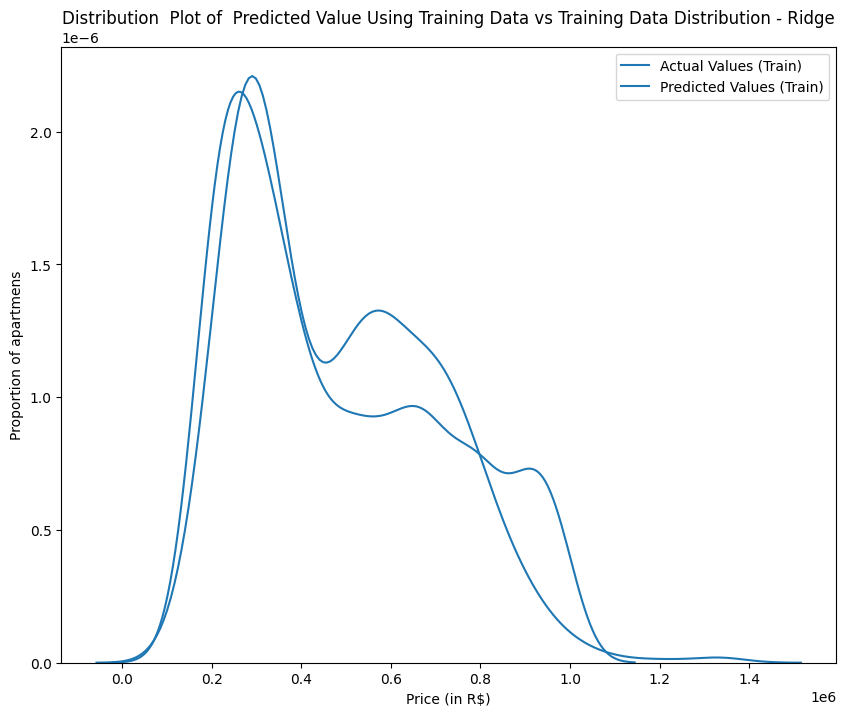

In [ ]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution - Ridge'
DistributionPlot(y_train, pipeline_ridge_pred, "Actual Values (Train)", "Predicted Values (Train)", Title)

## Polynomial Regressor valuation
#### [back to contents](#Table-of-Contents)

In [ ]:
valuation_metrics(random_search_polynomial,y_test, pipeline_polynomial_pred, "Polynomial")
valuation_metrics(random_search_polynomial_amenities,y_test_amenities, pipeline_polynomial_pred_amenities, "Polynomial", amenities=True)


Without Amenities
Polynomial - Melhor R2 score: 0.808
Polynomial - R2 score do modelo otimizado: 0.810
Polynomial - MSE: 11130684357.535
Polynomial - MAE do modelo otimizado: 80835.003
Polynomial - MAPE: 0.195
RMSPE: 0.036

With Amenities
Polynomial - Melhor R2 score: 0.854
Polynomial - R2 score do modelo otimizado: 0.859
Polynomial - MSE: 8365816465.715
Polynomial - MAE do modelo otimizado: 68997.538
Polynomial - MAPE: 0.162
RMSPE: 0.012



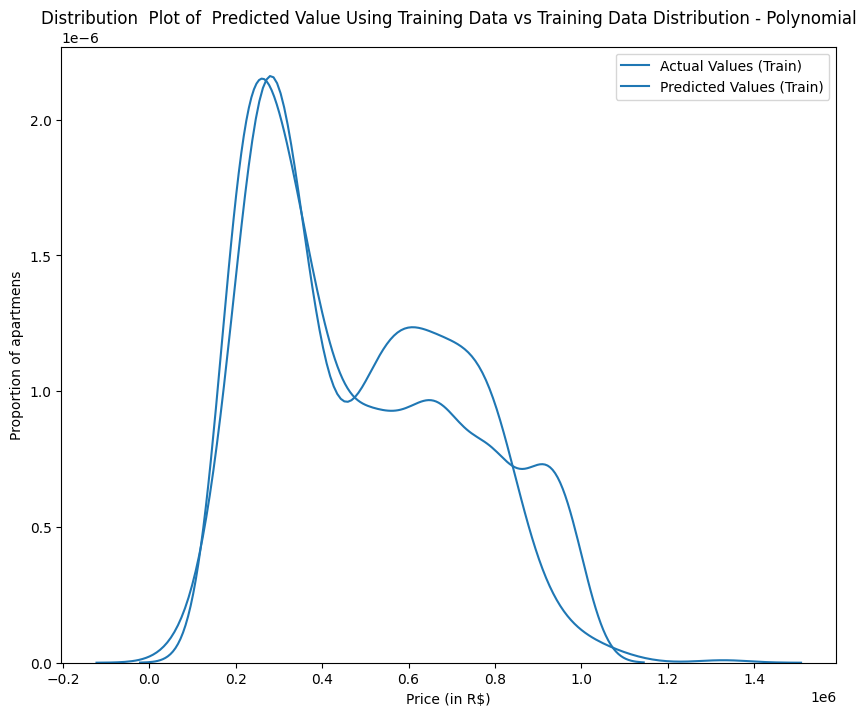

In [ ]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution - Polynomial'
DistributionPlot(y_train, pipeline_polynomial_pred, "Actual Values (Train)", "Predicted Values (Train)", Title)

## Multi Linear Regressor valuation
#### [back to contents](#Table-of-Contents)

Without Amenities
Multi Linear Regression - Melhor R2 score: 0.795
Multi Linear Regression - R2 score do modelo otimizado: 0.793
Multi Linear Regression - MSE: 12107742614.788
Multi Linear Regression - MAE do modelo otimizado: 84546.390
Multi Linear Regression - MAPE: 0.199
RMSPE: 0.048

With Amenities
Multi Linear Regression - Melhor R2 score: 0.858
Multi Linear Regression - R2 score do modelo otimizado: 0.863
Multi Linear Regression - MSE: 8157238237.271
Multi Linear Regression - MAE do modelo otimizado: 68598.074
Multi Linear Regression - MAPE: 0.161
RMSPE: 0.017



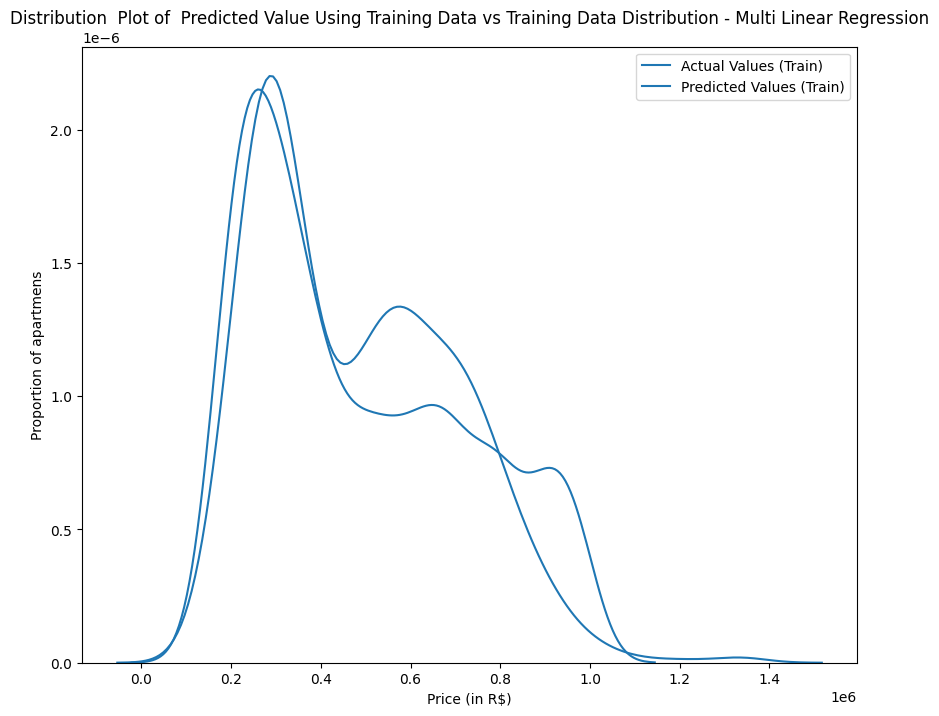

In [ ]:
valuation_metrics(random_search_lm,y_test, pipeline_lm_pred, "Multi Linear Regression")
valuation_metrics(random_search_lm_amenities,y_test_amenities, pipeline_lm_pred_amenities, "Multi Linear Regression", amenities = True )



Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution - Multi Linear Regression'
DistributionPlot(y_train, pipeline_lm_pred, "Actual Values (Train)", "Predicted Values (Train)", Title)

## Decision Tree Regressor valuation
#### [back to contents](#Table-of-Contents)

Without Amenities
Desicion Tree - Melhor R2 score: 0.717
Desicion Tree - R2 score do modelo otimizado: 0.734
Desicion Tree - MSE: 15573889921.266
Desicion Tree - MAE do modelo otimizado: 86521.752
Desicion Tree - MAPE: 0.211
RMSPE: 0.031

With Amenities
Decision Tree - Melhor R2 score: 0.657
Decision Tree - R2 score do modelo otimizado: 0.568
Decision Tree - MSE: 25605377093.863
Decision Tree - MAE do modelo otimizado: 111807.047
Decision Tree - MAPE: 0.252
RMSPE: 0.047



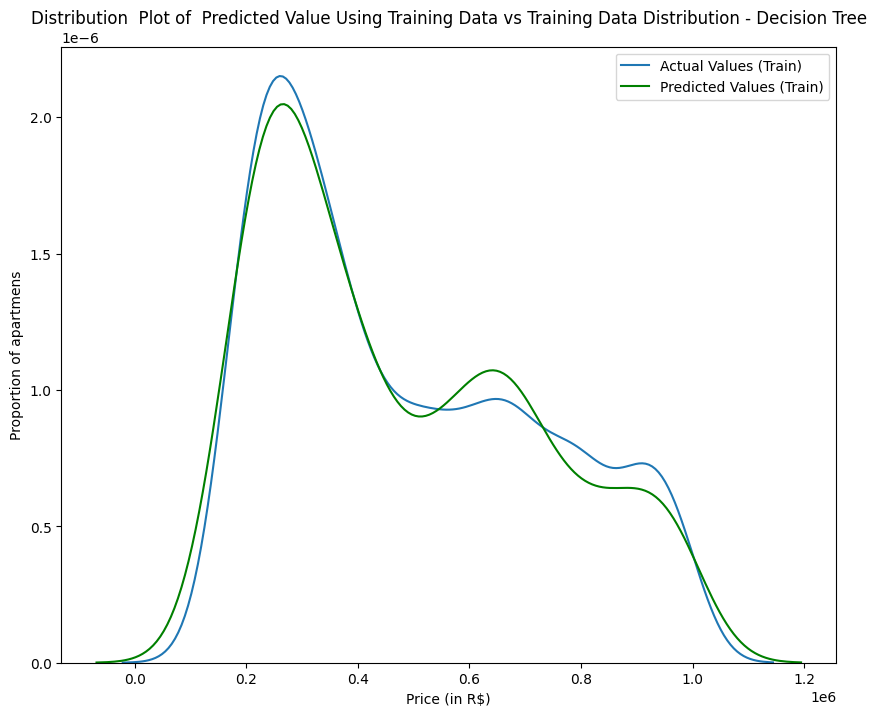

In [ ]:
valuation_metrics(random_search_dt,y_test, pipeline_dt_pred, "Desicion Tree")
valuation_metrics(random_search_dt_amenities,y_test_amenities, pipeline_dt_pred_amenities, "Decision Tree", amenities = True)


Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution - Decision Tree'
DistributionPlot(y_train, pipeline_dt_pred, "Actual Values (Train)", "Predicted Values (Train)", Title)

## Catboost Regressor valuation
#### [back to contents](#Table-of-Contents)

In [ ]:

# valuation_metrics(grid_search_cat,y_validation, pipeline_cat_pred, "Catboost Regressor")

Without Amenities
Catboost Regressor - Melhor R2 score: 0.848
Catboost Regressor - R2 score do modelo otimizado: 0.858
Catboost Regressor - MSE: 8318123693.221
Catboost Regressor - MAE do modelo otimizado: 69211.368
Catboost Regressor - MAPE: 0.166
RMSPE: 0.028

With Amenities
Catboost Regressor - Melhor R2 score: 0.916
Catboost Regressor - R2 score do modelo otimizado: 0.905
Catboost Regressor - MSE: 5663972289.394
Catboost Regressor - MAE do modelo otimizado: 50303.365
Catboost Regressor - MAPE: 0.114
RMSPE: 0.008



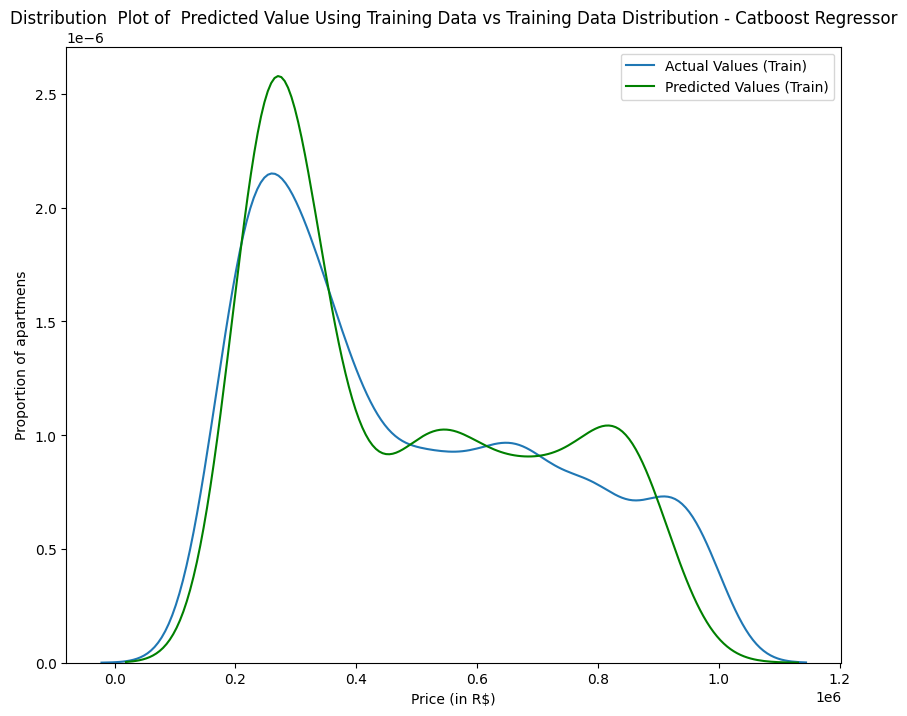

In [ ]:
valuation_metrics(random_search_cat, y_test, pipeline_cat_pred, "Catboost Regressor")
valuation_metrics(random_search_cat_amenities,y_test_amenities, pipeline_cat_pred_amenities, "Catboost Regressor", amenities = True)

Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution - Catboost Regressor'
DistributionPlot(y_train, pipeline_cat_pred, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [ ]:
# # Acessar os dados de treinamento para o modelo sem amenities
# train_scores = grid_search_cat.cv_results_['mean_train_score']
# print(train_scores)

# # # Acessar os dados de treinamento para o modelo com amenities
# # train_scores_amenities = random_search_cat_amenities.cv_results_['mean_train_score']
# # print(train_scores_amenities)

In [ ]:
# grid_search_cat
# # Obter o score de treinamento para o melhor modelo sem amenities
# train_score_best = grid_search_cat.score(X_validation, y_validation)
# print(train_score_best)

In [ ]:
# Obter o score de treinamento para o melhor modelo sem amenities
train_score_best = random_search_cat.score(X_validation, y_validation)
print(train_score_best)

# # Obter o score de treinamento para o melhor modelo com amenities
# train_score_best_amenities = random_search_cat_amenities.score(X_validation_amenities, y_validation_amenities)
# print(train_score_best_amenities)

0.8939442149849658


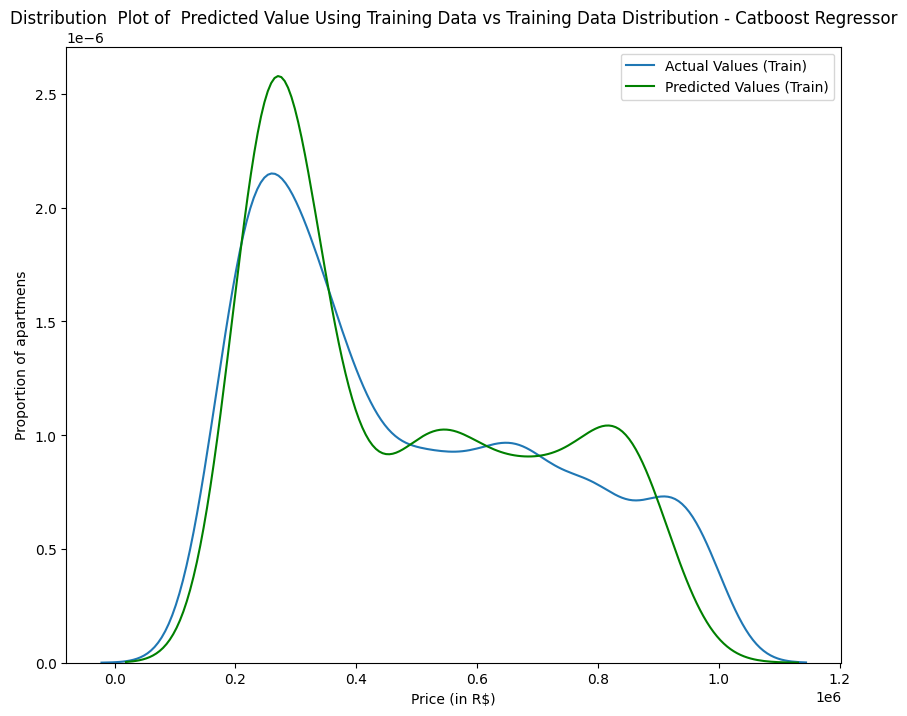

In [ ]:
# valuation_metrics(grid_search_cat,y_test, pipeline_cat_pred, "Catboost Regressor")
# valuation_metrics(random_search_cat_amenities,y_test_amenities, pipeline_cat_pred_amenities, "Catboost Regressor", amenities = True)


Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution - Catboost Regressor'
DistributionPlot(y_train, pipeline_cat_pred, "Actual Values (Train)", "Predicted Values (Train)", Title)
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution - Catboost Regressor with Amenities'
# DistributionPlot(y_train, pipeline_cat_pred_amenities, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [ ]:
feature_selected(random_search_cat, X_train)
# feature_selected(random_search_cat_amenities,X_train_amenities)

Nomes das features selecionadas (sem amenities):['usableAreas', 'suites', 'bathrooms', 'parkingSpaces', 'monthlyCondoFee', 'neighborhood']




## XGBoost Regressor valuation
#### [back to contents](#Table-of-Contents)

In [ ]:
valuation_metrics(random_search_xgb,y_test, pipeline_xgb_pred, "XGBoost Regressor")

Without Amenities
XGBoost Regressor - Melhor R2 score: 0.848
XGBoost Regressor - R2 score do modelo otimizado: 0.858
XGBoost Regressor - MSE: 8298682136.076
XGBoost Regressor - MAE do modelo otimizado: 68974.306
XGBoost Regressor - MAPE: 0.168
RMSPE: 0.027



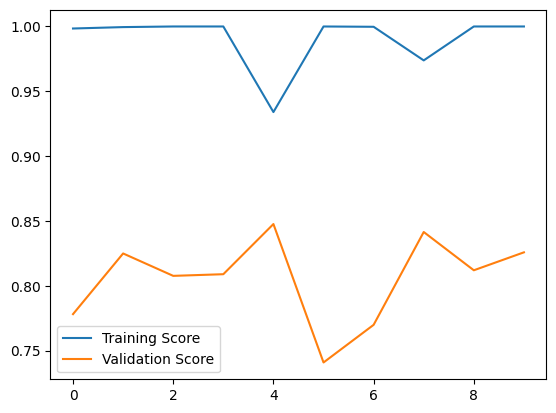

In [ ]:
# random_search_xgb = RandomizedSearchCV(
#     estimator=pipeline_xgb,
#     param_distributions=param_grid_xgb,
#     cv=5,
#     return_train_score=True,  # <--- Set this to True
#     refit=True,
#     scoring=scoring
# )

# random_search_xgb.fit(X_validation, y_validation)

# # Get the training and validation scores
train_scores = random_search_xgb.cv_results_['mean_train_score']
validation_scores = random_search_xgb.cv_results_['mean_test_score']

# # Plot the curves
plt.plot(train_scores, label='Training Score')
plt.plot(validation_scores, label='Validation Score')
plt.legend()
plt.show()

Model: Catboost Regressor
R2 Score: 0.994
MAE: 0.100
MSE: 0.010
MAPE: 3.900
RMSPE: 0.043



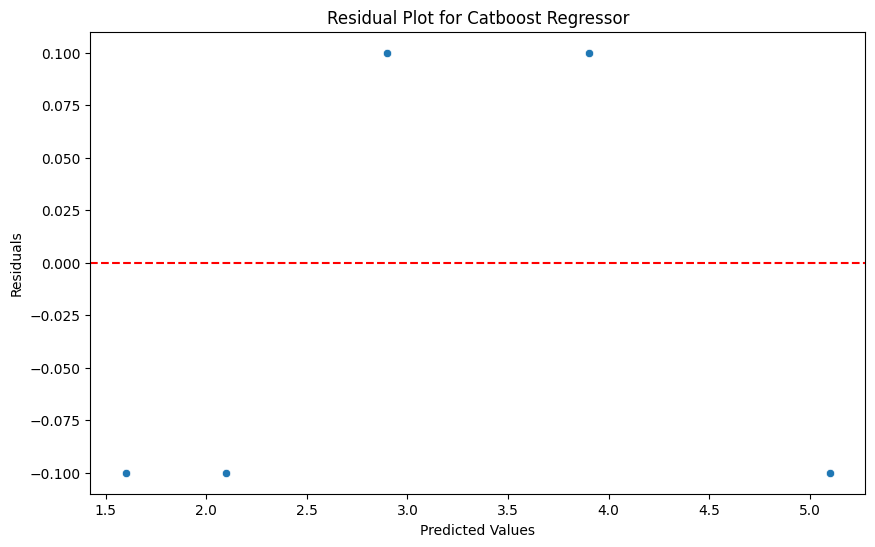

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Função para calcular o MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    nonzero_elements = y_true != 0
    return np.mean(np.abs((y_true[nonzero_elements] - y_pred[nonzero_elements]) / y_true[nonzero_elements])) * 100

# Função para calcular o MSPE
def mean_squared_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    nonzero_elements = y_true != 0
    return np.mean(((y_true[nonzero_elements] - y_pred[nonzero_elements]) / y_true[nonzero_elements]) ** 2)

# Função para exibir gráficos de erro residual
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Residual Plot for {model_name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

# Função para comparar modelos
def compare_models(results_dict):
    for model_name, metrics in results_dict.items():
        print(f"Model: {model_name}")
        print(f"R2 Score: {metrics['r2']:.3f}")
        print(f"MAE: {metrics['mae']:.3f}")
        print(f"MSE: {metrics['mse']:.3f}")
        print(f"MAPE: {metrics['mape']:.3f}")
        print(f"RMSPE: {metrics['rmspe']:.3f}\n")

# Exemplo de uso com dados fictícios
# Make sure y_test and pipeline_cat_pred are 1-D arrays
y_test = np.array([3.0, 1.5, 2.0, 4.0, 5.0])  # Example true values
pipeline_cat_pred = np.array([2.9, 1.6, 2.1, 3.9, 5.1])  # Example predicted values

results_dict = {
    'Catboost Regressor': {
        'r2': r2_score(y_test, pipeline_cat_pred),
        'mae': mean_absolute_error(y_test, pipeline_cat_pred),
        'mse': mean_squared_error(y_test, pipeline_cat_pred),
        'mape': mean_absolute_percentage_error(y_test, pipeline_cat_pred),
        'rmspe': np.sqrt(mean_squared_percentage_error(y_test, pipeline_cat_pred))
    },
    # Adicione outros modelos conforme necessário
}

compare_models(results_dict)
plot_residuals(y_test, pipeline_cat_pred, 'Catboost Regressor')


In [ ]:
def feature_selected(hyperparameter, X_train):
    """
    Exibe os nomes das features selecionadas pelo modelo.
    """
    # Obtendo o seletor de features
    feature_selection = hyperparameter.named_steps['feature selection']
    
    # Obtendo as features selecionadas
    selected_features = feature_selection.get_support()
    
    # Nomes das features
    feature_names = X_train.columns
    
    # Exibindo as features selecionadas
    selected_feature_names = feature_names[selected_features]
    print(f"Nomes das features selecionadas: {selected_feature_names.tolist()}")
    
# Verifique as features selecionadas para os modelos com e sem amenities
feature_selected(random_search_cat.best_estimator_, X_train)
feature_selected(random_search_cat_amenities.best_estimator_, X_train_amenities)


Nomes das features selecionadas: ['usableAreas', 'suites', 'bathrooms', 'parkingSpaces', 'monthlyCondoFee', 'neighborhood']
Nomes das features selecionadas: ['usableAreas', 'suites', 'bathrooms', 'parkingSpaces', 'monthlyCondoFee', 'price_per_sqft', 'neighborhood', 'adult_game_room', 'air_conditioning', 'balcony', 'barbecue_grill', 'concierge_24h', 'dinner_room', 'electronic_gate', 'elevator', 'furnished', 'garden', 'gated_community', 'gourmet_space', 'gym', 'intercom', 'laundry', 'party_hall', 'pets_allowed', 'playground', 'service_area', 'sports_court', 'pool']


Number of importances: 6
Number of feature names: 6


C:\Users\Renan\AppData\Local\Temp\ipykernel_54384\2609300748.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




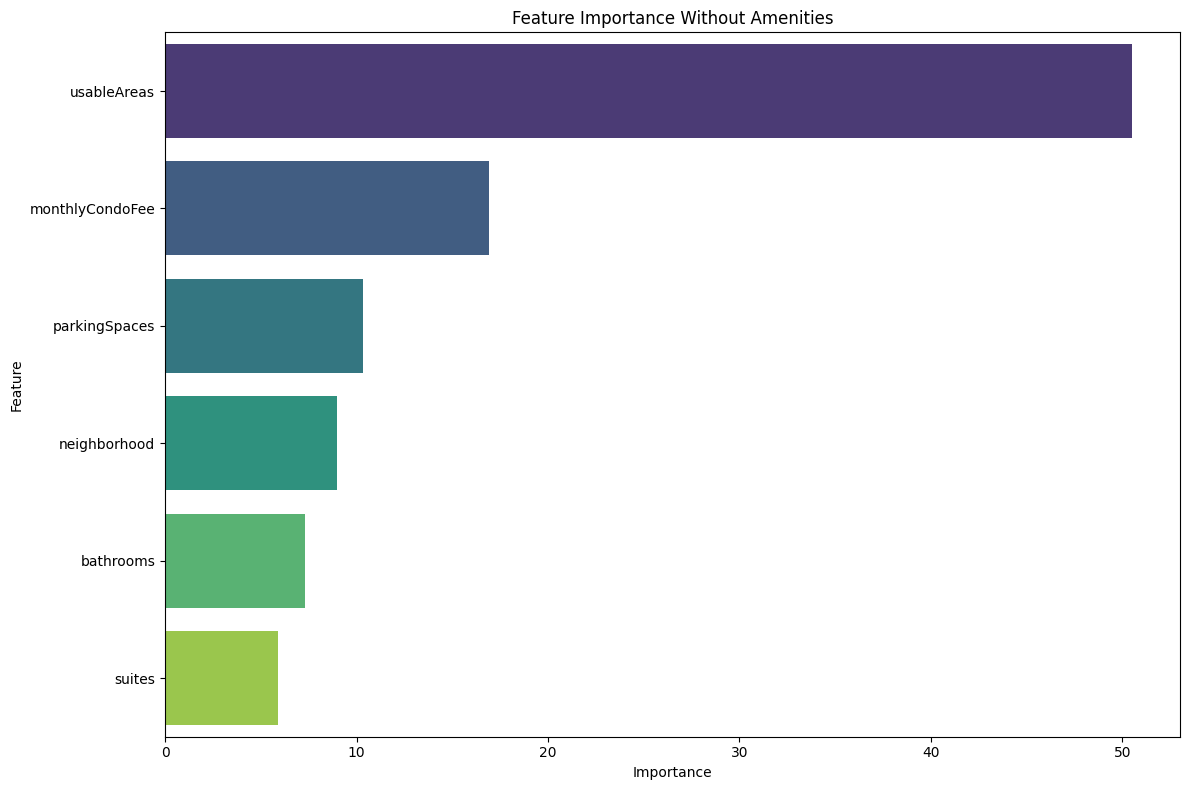

Number of importances: 28
Number of feature names: 28


C:\Users\Renan\AppData\Local\Temp\ipykernel_54384\2609300748.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




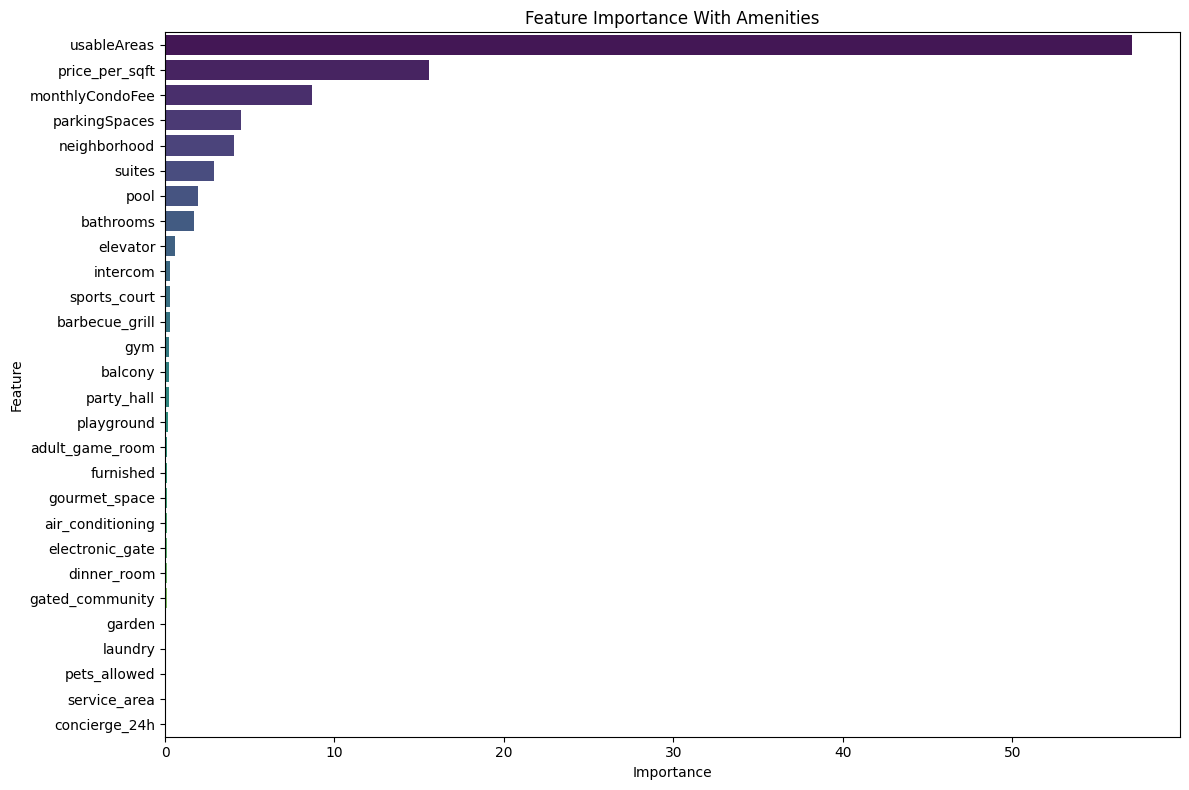

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_feature_importance(pipeline, X_train, title):
    """
    Plota a importância das features para o modelo fornecido dentro do pipeline.
    """
    # Obtendo o modelo diretamente do pipeline
    model = pipeline.named_steps['model']
    
    # Obtendo a importância das features
    importances = model.get_feature_importance()
    
    # Obtendo os nomes das features do seletor
    feature_selector = pipeline.named_steps['feature selection']
    selected_features = feature_selector.get_support()
    feature_names = X_train.columns[selected_features]
    
    # Verifica se a quantidade de importâncias e o número de features são iguais
    print(f"Number of importances: {len(importances)}")
    print(f"Number of feature names: {len(feature_names)}")
    
    if len(importances) != len(feature_names):
        raise ValueError("Length of importances and feature names does not match.")
    
    # Criando o DataFrame para plotagem
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    
    # Ordenando as features pela importância
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # Configurando o gráfico
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title(title)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    
    # Salvando a imagem
    plt.savefig(title.replace(' ', '_').replace(':', '') + '.png')
    plt.show()

# Gerar gráficos de importância das features para o modelo com e sem amenities
plot_feature_importance(random_search_cat.best_estimator_, X_train, "Feature Importance Without Amenities")
plot_feature_importance(random_search_cat_amenities.best_estimator_, X_train_amenities, "Feature Importance With Amenities")


In [ ]:
## XGBoost-Regressor-valuation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# Function for valuation
def valuation_metrics(hyperparameter, y_test, y_pred, modelo, amenities = False ):
    """
Avalia o desempenho de um modelo otimizado e exibe métricas como R2, MAE, MSE e MAPE.

Parameters:
- hyperparameter: o modelo otimizado via RandomizedSearchCV.
- y_test: valores reais de teste.
- y_pred: valores previstos pelo modelo.
- modelo: nome do modelo.
- amenities: booleano para verificar se os amenities foram incluídos.
"""
    if amenities == True:
        print("With Amenities")

    else:
        print("Without Amenities")
    # Melhor R2 score encontrado
    best_r2_score = hyperparameter.best_score_
    print(f"{modelo} - Melhor R2 score: {best_r2_score:.3f}")
    
    # Coefficient of Determination (R-squared): It measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). 
    r2_score_optimized = r2_score(y_test, y_pred)
    print(f"{modelo} - R2 score do modelo otimizado: {r2_score_optimized:.3f}")

    # Mean Squared Error (MSE): It measures the average squared difference between predicted and actual values.
    mse = mean_squared_error(y_test, y_pred)
    print(f"{modelo} - MSE: {mse:.3f}")
    
    # Mean Absolute Error (MAE): It measures the average absolute difference between predicted and actual values.
    mae_optimized = mean_absolute_error(y_test, y_pred)
    print(f"{modelo} - MAE do modelo otimizado: {mae_optimized:.3f}")

    # Mean Absolute Percentage Error (MAPE): It measures the average absolute percentage difference between predicted and actual values.
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f"{modelo} - MAPE: {mape:.3f}")

    # Root Mean Squared Percentage Error (RMSPE): It measures the square root of the average squared percentage difference between predicted and actual values.
    y_pred_reshaped = y_pred.reshape(-1, 1)
    def mean_squared_percentage_error(y_true, y_pred):
        return np.mean((y_true - y_pred) / y_true) ** 2

    rmspe = np.sqrt(mean_squared_percentage_error(y_test, y_pred_reshaped))
    print(f"RMSPE: {rmspe:.3f}\n")






# Function to verify selected features
def feature_selected(hyperparameter, X_train ):
    feature_selection = hyperparameter.best_estimator_.named_steps['feature selection']
    selected_features = feature_selection.get_support()

    feature_names = X_train.columns[selected_features]
    print(f"Nomes das features selecionadas (sem amenities):{feature_names.tolist()}\n", )



import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 10
    height = 8
    plt.figure(figsize=(width, height))
    palette = sns.color_palette(["blue", "green"])

    ax1 = sns.kdeplot(RedFunction, color=palette[0], label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color=palette[1], label=BlueName, ax = ax1)

    plt.title(Title)
    plt.xlabel('Price (in R$)')
    plt.ylabel('Proportion of apartmens')
    plt.legend()
    plt.show()
    plt.close()

In [ ]:
import xgboost as xgb

xgbregressor = xgb.XGBRegressor(objective='reg:squarederror', max_depth=4, learning_rate=0.01, n_estimators=1000)

param_grid_xgb = {
    'model__max_depth': [3, 6, 9, 12, 15],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
    'model__n_estimators': [100, 500, 1000, 2000, 5000],
    'model__gamma': [0.001, 0.1, 1, 10, 100],
    'model__subsample': [0.5, 0.8, 1],
    'model__colsample_bytree': [0.5, 0.8, 1],
    'model__reg_alpha': [0.001, 0.1, 1, 10, 100],
    'model__reg_lambda': [0.001, 0.1, 1, 10, 100]
}

pipeline_xgb = ImbPipeline(steps=[
    ('feature selection', SmartC),
    ('model', xgbregressor)
])

random_search_xgb = RandomizedSearchCV(
    estimator=pipeline_xgb,
    param_distributions=param_grid_xgb,
    cv=5,
    return_train_score=True,
    refit=True,
    scoring=scoring
)

random_search_xgb.fit(X_validation, y_validation)
best_model_xgb = random_search_xgb.best_estimator_
pipeline_xgb_pred = best_model_xgb.predict(X_test)

In [ ]:
pipeline_xgb_pred[0:10]

array([272896.8 , 545694.7 , 334298.1 , 190988.83, 373402.6 , 523650.53,
       729864.9 , 297217.25, 311405.7 , 434099.16], dtype=float32)

In [ ]:
y_test[0:10]

,price
294,189000
3789,529900
2650,340000
2046,160000
1970,590000
4076,464900
3655,735000
3915,330725
190,278000
3783,583900


In [ ]:
best_model_xgb

Pipeline(steps=[('feature selection', SmartCorrelatedSelection(scoring='r2')),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.5, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=0.1, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.01,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=12, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=5000, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])